## Linear pulse propagation

$E(z,t) = A(t)\cos(\omega t)$

Gaussian pulse:
$A(t) = exp(-t^2/T^2)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.constants import pi, c

#The following hack is for importing a module from the "Modules" folder
import os
cwd = os.getcwd()
os.chdir('..')
from Modules.analysis import FTX, IFTX
from Modules.materials import *
from Modules.waveguides import *
os.chdir(cwd)

In [2]:
c = c*1e-6; #um/ps, [Freq]=THz]

wl = 1;
print(c/wl)

299.792458


### Envelope

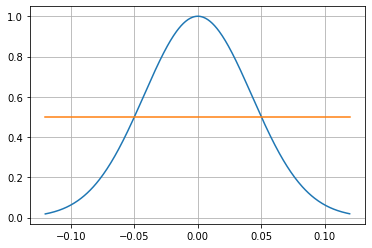

In [3]:
DT = 0.1
tp = DT/np.sqrt(4*np.log(2)) 
ts = tp/100 #Sampling period

t = np.arange(-10*tp,10*tp,ts)
a_in =  np.exp(-t**2/tp**2)

t1 = 800
t2 = 1200
# t1 = 0
# t2 = 2000
plt.plot(t[t1:t2],a_in[t1:t2])
plt.plot(t[t1:t2],0.5*np.ones(t[t1:t2].shape))
plt.grid()

### Field

Freq =  149.896229 THz


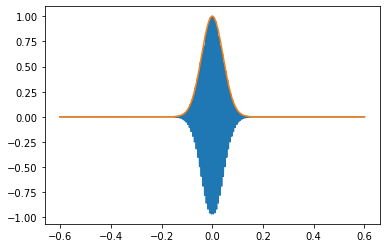

In [4]:
wl0 = 2
f0 = c/wl0
print('Freq = ', f0, 'THz')
w0 = 2*pi*f0

e_carrier = np.exp(1j*w0*t)
e_in = np.real(a_in*e_carrier)
plt.plot(t,e_in,t,a_in);

### Spectrum

Text(0.5, 0, 'Frequency (THz)')

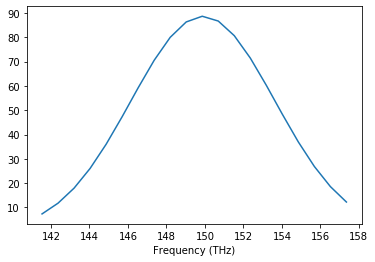

In [5]:
E_in, freqs = FTX(e_in, ts, NFFT=len(e_in))
idx_center = np.amax(np.argwhere(freqs<150))
idx_f1 = idx_center -10
idx_f2 = idx_center + 10
freq_window = freqs[idx_f1:idx_f2]
E_in_window = E_in[idx_f1:idx_f2]
plt.plot(freq_window, abs(E_in_window))
plt.xlabel('Frequency (THz)')

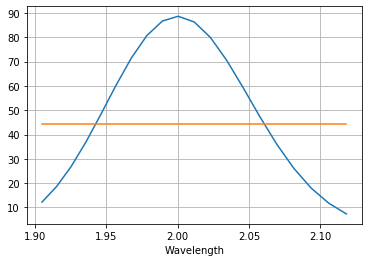

In [6]:
plt.plot(c/freq_window, abs(E_in_window))
plt.xlabel('Wavelength')
plt.plot(c/freq_window, np.amax(abs(E_in_window))*np.ones(freq_window.shape)/2)
plt.grid()

Text(0.5, 0, 'Frequency')

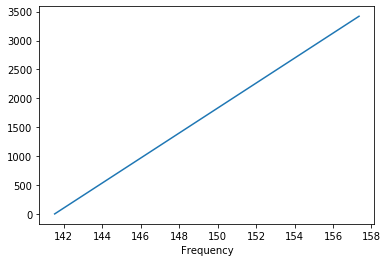

In [7]:
plt.plot(freq_window, np.unwrap(np.angle(E_in_window))*180/pi)
# plt.plot(freqs, np.unwrap(np.angle(E_in)*180/pi))
plt.xlabel('Frequency')

### Linear prop

Text(0.5, 0, 'Frequency (THz)')

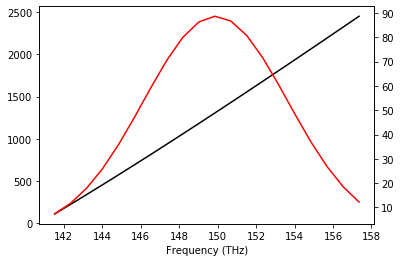

In [8]:
L = 5000
wl = c/freq_window
df = freq_window[1]-freq_window[0]
# print(wl)

n0 = 1
nLN = refractive_index('LN_MgO_e', wl)
nSiO2 = refractive_index('SiO2', wl)
dslab = 0.45
dridge = 0.7
wridge = 1.5

n_slab = np.zeros(wl.shape)
n_ridge = np.zeros(wl.shape)
neff = np.zeros(wl.shape)
for kw in range(wl.size):
    n_slab[kw]= neff_asymmetric_slab(n0, nLN[kw], nSiO2[kw], dslab, wl[kw], mode='TE even', order=0)
    n_ridge[kw]= neff_asymmetric_slab(n0, nLN[kw], nSiO2[kw], dridge, wl[kw], mode='TE even', order=0)
    neff[kw] = neff_symmetric_slab(n_slab[kw], n_ridge[kw], wridge, wl[kw], mode='TM even', order=0)

w = 2*pi*freq_window
beta = w*neff/c
H = np.exp(1j*beta*L)

beta1 = np.gradient(beta, df)
beta2 = np.gradient(beta1, df)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

ax1.plot(freq_window, np.unwrap(np.angle(H))*180/pi, 'k')
ax2.plot(freq_window, abs(E_in_window), 'r')
ax1.set_xlabel('Frequency (THz)')

# plt.plot(freq_window, neff)

Text(0.5, 0, 'Wavelength ($\\mu$m)')

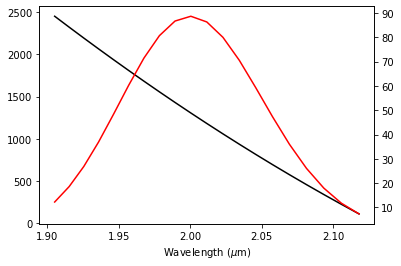

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

ax1.plot(wl, np.unwrap(np.angle(H))*180/pi, 'k')
ax2.plot(wl, abs(E_in_window), 'r')
ax1.set_xlabel('Wavelength ($\mu$m)')

Text(0.5, 0, 'Wavelength ($\\mu$m)')

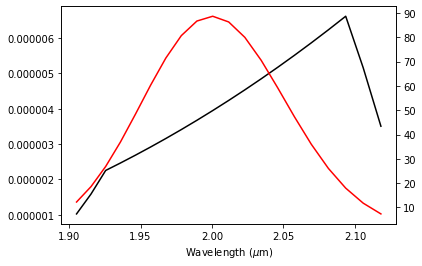

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

# ax1.plot(wl, neff, 'k')
ax1.plot(wl, beta2, 'k')
ax2.plot(wl, abs(E_in_window), 'r')
ax1.set_xlabel('Wavelength ($\mu$m)')

### Output signal

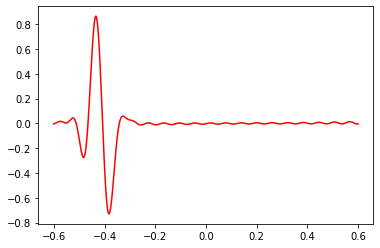

In [11]:
E_out_window = E_in_window*H
e_out, tout = IFTX(E_out_window, df, len(e_in))

# plt.plot(t, e_out, 'r', t, e_in, 'b')
plt.plot(t, e_out, 'r')

In [12]:
print(c/2.3)

130.34454695652175
